<a href="https://colab.research.google.com/github/emilyberlinghoff/DS3000/blob/main/Homework%203/Assignment_3_Clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3: Classification with Logistic Regression

## Instructions

* Complete the assignment as outlined below.
* Restart your kernel and rerun your cells before submission.
* Submit your completed notebook (.ipynb).

## Dataset Information

The dataset contains health-related data for predicting diabetes. Below are the features:

* `Pregnancies`: Number of pregnancies
* `Glucose`: Plasma glucose concentration
* `BloodPressure`: Diastolic blood pressure (mm Hg)
* `SkinThickness`: Triceps skin fold thickness (mm)
* `Insulin`: 2-hour serum insulin (mu U/ml)
* `BMI`: Body mass index
* `DiabetesPedigreeFunction`: Diabetes pedigree function
* `Age`: Age (years)
* `Outcome`: Target variable (1 = Diabetes, 0 = No Diabetes)

Your goal in this homework is to train a first model for predicting the probability that a patient has diabetes given their healthcare data.

In [62]:
# Suggested packages, you can add more if you think they are necessary.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline

# Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
# Download the data. Uncomment if using Colab.
# !gdown https://drive.google.com/uc?id=1-_YcEl0q5LsDXRq5eix9K4gjSq78Ffd5

## Question 1:

1. Load the dataset `diabetes.csv` and display the first 5 rows.
2. Print out all columns in the dataset and identify any missing values.
3. Show the descriptive statistics of the data.

In [64]:
# Load the dataset
file_path = "diabetes.csv"

# Check if file exists before loading
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    df = None
    print("The file 'diabetes.csv' was not found. Please upload it.")

In [65]:
# Report number of null values

print("Column Names:")
print(df.columns.tolist())

print("\nMissing Values in Each Column:")
print(df.isnull().sum())

Column Names:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Missing Values in Each Column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [66]:
# Show descriptive statistics
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

## Question 2:

What is the baseline accuracy for this classification problem? Baseline accuracy is the accuracy of always predicting the most common class. You can assume there are no outliers in the data.

In [67]:
# Question 2 code

# Find the most common class
most_common_class = df["Outcome"].value_counts().idxmax()
most_common_count = df["Outcome"].value_counts().max()

# Calculate baseline accuracy
baseline_accuracy = most_common_count / len(df)

print(f"Most common class: {most_common_class}")
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

Most common class: 0
Baseline Accuracy: 0.6510


## Question 3:

Split the data into training and testing sets. Use 70% of the data for training and 30% for testing. Pass `random_state = 42` to `train_test_split`. Ensure the `Outcome` column is the response variable. Report the descriptive statistics of X_train and X_test.

In [68]:
# Question 3 code
# Define features (X) and target (y)
X = df.drop(columns=["Outcome"])  # All columns except "Outcome"
y = df["Outcome"]  # Target variable

# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print dataset shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



# Show the descriptive stats
print("Descriptive Statistics for X_train:")
print(X_train.describe())
print("\nDescriptive Statistics for X_test:")
print(X_test.describe())




Training set shape: (537, 8) (537,)
Testing set shape: (231, 8) (231,)
Descriptive Statistics for X_train:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   537.000000  537.000000     537.000000     537.000000  537.000000   
mean      3.726257  120.849162      69.685289      20.432030   79.836127   
std       3.262965   32.339523      18.094374      15.490715  115.196730   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      64.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   36.000000   
75%       6.000000  139.000000      80.000000      32.000000  129.000000   
max      17.000000  199.000000     122.000000      63.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  537.000000                537.000000  537.000000  
mean    31.975605                  0.469920   33.074488  
std      7.624495                 

**Written question: Are the descriptive statistics of the X_train and X_test datasets similar? Is this a reasonable dataset for the problem?**

**Written answer:**

## Question 4:

1. Create a pipeline that first standardizes the data using a z-scale transform, and then trains an instance of `LogisticRegression` with `penalty = None` and `max_iter = 1000`. Use the same random seed you used before.
2. Train the pipeline using the training set.

In [69]:
# Question 4 code
# Create a pipeline that scales the features and trains a logistic regression model

# Define the pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Z-score normalization
    ("logreg", LogisticRegression(penalty=None, max_iter=1000, random_state=42))  # Logistic Regression model
])



# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(max_iter=1000, penalty=None,
                                    random_state=42))])

## Question 5:

1. Compute the model’s accuracy on the training and testing sets.
2. Display the model’s coefficients and intercept.

In [70]:
# Display coefficients
# Get the training parameters in a dataframe with the corresponding feature names
logreg_model = pipeline.named_steps["logreg"]
print("Model Coefficients:")
print(logreg_model.coef_)



# Get the intercept of the logistic regression model
print("\nIntercept:")
print(logreg_model.intercept_)


Model Coefficients:
[[ 0.18924815  1.15855495 -0.19573648 -0.02434606 -0.11336718  0.8311444
   0.14430978  0.42013711]]

Intercept:
[-0.88707556]


In [71]:
# Calculate accuracy

# Predict on training and testing sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Compute accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")




Training Accuracy: 0.7821
Testing Accuracy: 0.7359


## Question 6:

1. Plot the ROC curve for the logistic regression model using the testing set. Make sure your plot includes a title and properly labeled axes.
2. Compute the area under the curve (AUC). Report the AUC at the top-left of your plot.

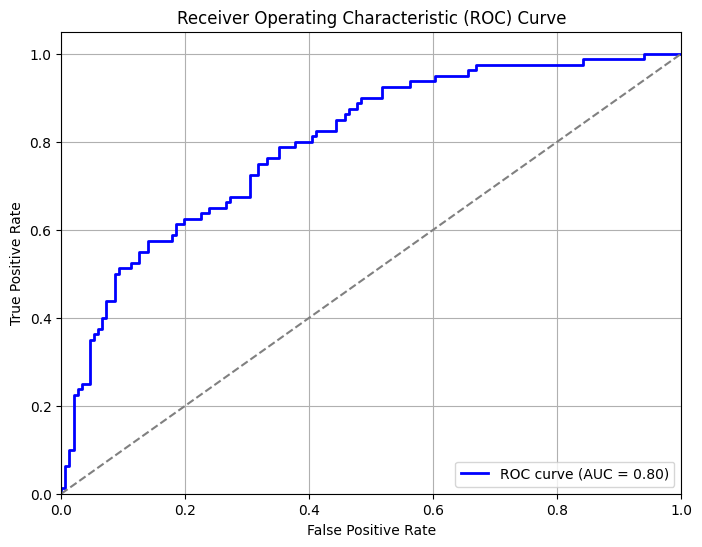

In [72]:
# Question 6 code
# Compute probabilities
y_test_prob = pipeline.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)



# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()






**Written question: Comment on the capacity of the model to predict the outcome. Is the AUC acceptable?**

**Written answer:**

Since the AUC is greater than 0.7, it's better than mediocre. The model ranks diabetic higher than non-diabetic in th majority of the cases. The curve is also a nice curve in the way that it has a good balance between true positives false positives. Therefore, based on te 80% score, the model has a strong capacity to predict outcomes accurately.